In [1]:
from ipfx.x_to_nwb import ABFConverter
ABFConverter.ABFConverter('examples/Cell2/JS-A2-C03(350)-P01-2017_10_13_0013.abf', 'output/JS-A2-C03(350)-P01-2017_10_13_0013.nwb', 'outputFeedback/')

C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\x_to_nwb\ABFConverter.py:135: UserWarning: Could not find the JSON file examples/Cell2/JS-A2-C03(350)-P01-2017_10_13_0013.json with settings.
  warnings.warn(f"Could not find the JSON file {settings} with settings.")
C:\Users\Allose\Anaconda3\lib\site-packages\pynwb\file.py:752: UserWarning: Date is missing timezone information. Updating to local timezone.
  warn("Date is missing timezone information. Updating to local timezone.")
C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\x_to_nwb\ABFConverter.py:444: UserWarning: Could not find the scale factor for the stimset Monkey_1000 ms step, using 1.0 as fallback.
  warnings.warn(f"Could not find the scale factor for the stimset {stimset}, using 1.0 as fallback.")
C:\Users\Allose\Anaconda3\lib\site-packages\pynwb\icephys.py:312: UserWarning: Unit 'A' for CurrentClampStimulusSeries 'index_00' is ignored and will be set to 'amperes' as per NWB 2.1.0.
  % (current_unit, self.__class__.__name__

C:\Users\Allose\Anaconda3\lib\site-packages\pynwb\icephys.py:312: UserWarning: Unit 'V' for CurrentClampSeries 'index_18' is ignored and will be set to 'volts' as per NWB 2.1.0.
  % (current_unit, self.__class__.__name__, name, unit, nwb_version))
C:\Users\Allose\Anaconda3\lib\site-packages\pynwb\icephys.py:312: UserWarning: Unit 'V' for CurrentClampSeries 'index_19' is ignored and will be set to 'volts' as per NWB 2.1.0.
  % (current_unit, self.__class__.__name__, name, unit, nwb_version))


In [2]:

# Load IPFX libraries
from ipfx.dataset.create import create_ephys_data_set
from ipfx.data_set_features import extract_data_set_features
from ipfx.utilities import drop_failed_sweeps
from ipfx.qc_feature_extractor import sweep_qc_features

# Load pandas library too
import pandas as pd
from ipfx.dataset.create import create_ephys_data_set
from ipfx.utilities import drop_failed_sweeps

file_name = "output/JS-A2-C03(350)-P01-2017_10_13_0013.nwb"

# Create Ephys Data Set

print('loading dataset into data structure...')
#nwb_file_name = '/Users/stripathy/Downloads/sub-601462951_ses-601810292_icephys.nwb'
data_set = create_ephys_data_set(nwb_file=file_name, ontology="ipfx/ipfx/defaults/stimulus_ontology.json") ##loads nwb file into ipfx data structure

#sweep = data_set.sweep(0)
# sweep_features = sweep_qc_features(data_set)
# Drop failed sweeps: sweeps with incomplete recording or failing QC criteria
drop_failed_sweeps(data_set)
# ipfx.data_set_features.extract_data_set_features(data_set, subthresh_min_amp=None)[source]

loading dataset into data structure...


In [3]:
from ipfx.feature_extractor import SpikeFeatureExtractor, SpikeTrainFeatureExtractor

import ipfx.stimulus_protocol_analysis as spa
from ipfx.epochs import get_stim_epoch
import matplotlib.pyplot as plt


# get sweep table of Long Square sweeps
long_square_table = data_set.filtered_sweep_table(
    stimuli=data_set.ontology.long_square_names
)
long_square_sweeps = data_set.sweep_set(long_square_table.sweep_number)

long_square_sweeps = data_set.sweep_set()

# Select epoch corresponding to the actual recording from the sweeps
# and align sweeps so that the experiment would start at the same time
long_square_sweeps.select_epoch("recording")
long_square_sweeps.align_to_start_of_epoch("experiment")

# find the start and end time of the stimulus
# (treating the first sweep as representative)
stim_start_index, stim_end_index = get_stim_epoch(long_square_sweeps.i[0], test_pulse=False)
stim_start_time = long_square_sweeps.t[0][stim_start_index]
stim_end_time = long_square_sweeps.t[0][stim_end_index]

# stim_start_time = 0.8
# stim_end_time = 1.8

# build the extractors
spfx = SpikeFeatureExtractor(start=stim_start_time, end=stim_end_time, filter = 1)
sptfx = SpikeTrainFeatureExtractor(start=stim_start_time, end=stim_end_time)

# run the analysis and print out a few of the features
long_square_analysis = spa.LongSquareAnalysis(spfx, sptfx, subthresh_min_amp=-100.0)
data = long_square_analysis.analyze(long_square_sweeps)

fields_to_print = [
    'tau',
    'v_baseline',
    'input_resistance',
    'vm_for_sag',
    'fi_fit_slope',
    'sag',
    'rheobase_i'
]

for field in fields_to_print:
    print("%s: %s" % (field, str(data[field])))

C:\Users\Allose\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
C:\Users\Allose\Anaconda3\lib\site-packages\ipfx\spike_features.py:87: RuntimeWarning: invalid value encountered in less
  width_levels[width_levels < v[spike_indexes]] = thresh_to_peak_levels[width_levels < v[spike_indexes]]
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate thr

INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.

INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.

INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.

INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair

INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that pair
INFO:root:Could not redetermine threshold-peak pair - dropping that 

INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.005000 s)
INFO:root:Need to recalculate threshold-peak pair that exceeds maximum allowed interval (0.

tau: 0.019374841367187874
v_baseline: -56.9110652923584
input_resistance: 502.5635361671448
vm_for_sag: -97.76611
fi_fit_slope: 0.07845795403243559
sag: 0.24006807804107666
rheobase_i: 29.999998092651367


In [27]:
from ipfx.data_set_features import extract_data_set_features

# Calculate ephys features
cell_features, sweep_features, cell_record, sweep_records, _, _ = extract_data_set_features(data_set)

# print cell_record
cell_features

INFO:root:  
INFO:root:***** ***** ***** Analyzing cell features: ***** ***** *****
INFO:root:------------------------------------------------------------
INFO:root:  
INFO:root:  
INFO:root:***** ***** ***** Long Squares: ***** ***** *****
INFO:root:-------------------------------------------------
INFO:root:  
INFO:root:Assigned subthreshold minimum amplitude of -100.000000.
INFO:root:  
INFO:root:***** ***** ***** Short Squares: ***** ***** *****
INFO:root:--------------------------------------------------
INFO:root:  
INFO:root:  
INFO:root:***** ***** ***** Ramps: ***** ***** *****
INFO:root:------------------------------------------
INFO:root:  
INFO:root:  
INFO:root:***** ***** ***** Analyzing sweep features: ***** ***** *****
INFO:root:-------------------------------------------------------------
INFO:root:  


{'long_squares': None, 'short_squares': None, 'ramps': None}

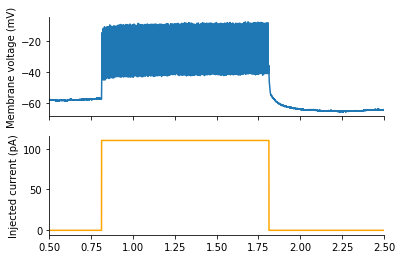

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# these are basic IPFX objects for working with sweeps and sets of sweeps
from ipfx.sweep import Sweep, SweepSet 

sweep_plot_index = 11 # which sweep number do you want to plot?

curr_sweep = data_set.sweep_set(sweep_plot_index).sweeps[0]
t = curr_sweep.t
v = curr_sweep.v
i = curr_sweep.i

fig, axes = plt.subplots(2, 1, sharex=True)

axes[0].plot(t, v)
axes[0].set_xlim(.5, 2.5)
axes[0].set_ylabel("Membrane voltage (mV)")

axes[1].plot(t, i, c="orange")
axes[1].set_ylabel("Injected current (pA)")

sns.despine()

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# these are basic IPFX objects for working with sweeps and sets of sweeps
from ipfx.sweep import Sweep, SweepSet 

sweep_plot_index = 11 # which sweep number do you want to plot?

curr_sweep = data_set.sweep_set

curr_sweep(1)

In [23]:

def summarize_cell_ephys_features(lsa_results):
    hero_keep_features = ['adapt', 'avg_rate', 'first_isi', 'isi_cv', 'latency', 'mean_isi', 'median_isi', 
                          'stim_amp']
    rheo_keep_features = ['threshold_v', 'peak_v', 'trough_v', 
     'fast_trough_v', 'adp_v', 'width', 'upstroke_downstroke_ratio', 'peak_t', 'fast_trough_t', 'trough_t']
    
    overall_cell_keep_features = ['v_baseline', 'rheobase_i', 'fi_fit_slope', 
                                  'sag', 'vm_for_sag', 'input_resistance', 'tau']
    
    hero_small_dict = lsa_results['hero_sweep'][hero_keep_features]
    rheobase_sweep_index = lsa_results['rheobase_sweep'].name
    rheobase_sweep = lsa_results['spikes_set'][rheobase_sweep_index].iloc[0]
    
    rheo_spike_small_dict = rheobase_sweep[rheo_keep_features]
    rheo_first_isi = lsa_results['rheobase_sweep']['first_isi']
    rheo_spike_small_dict['rheo_first_isi'] = rheo_first_isi

    spike_comb_dict = {**hero_small_dict, **rheo_spike_small_dict}

    overall_cell_features = {x: lsa_results[x] for x in overall_cell_keep_features if x in lsa_results}
    final_cell_feature_dict = {**spike_comb_dict, **overall_cell_features}
    return(final_cell_feature_dict)

In [24]:
summarize_cell_ephys_features(data)

{'adapt': -0.013664123767733231,
 'avg_rate': 35.0,
 'first_isi': 0.02450000000000019,
 'isi_cv': 1.0619105859731666,
 'latency': 0.011199999999999877,
 'mean_isi': 0.019694117647058824,
 'median_isi': 0.012249999999999983,
 'stim_amp': 110.0,
 'threshold_v': -44.28101,
 'peak_v': -5.78003,
 'trough_v': -58.642582,
 'fast_trough_v': -58.642582,
 'adp_v': nan,
 'width': 0.0008000000000001339,
 'upstroke_downstroke_ratio': 0.8232273727813034,
 'peak_t': 0.8110999999999999,
 'fast_trough_t': 0.8131999999999999,
 'trough_t': 0.8131999999999999,
 'rheo_first_isi': 0.01550000000000007,
 'v_baseline': -42.02229243963957,
 'rheobase_i': 50.0,
 'fi_fit_slope': 0.07029780564263313,
 'sag': 138.640625,
 'vm_for_sag': -91.90674,
 'input_resistance': 340.63720703125,
 'tau': nan}

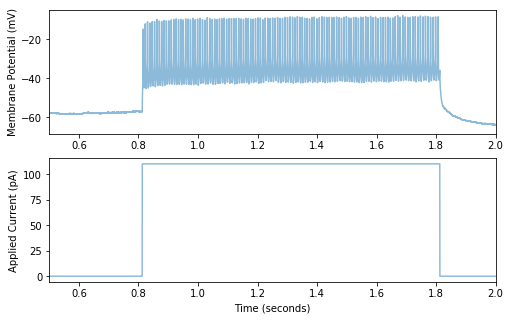

In [18]:
### Import statements
import pyabf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# refers to example_datasets folder in github repo
file_rel_path = 'examples/Cell2/'

curr_file = 'JS-A2-C03(350)-P01-2017_10_13_0013.abf'
abf_file_path = file_rel_path + curr_file

abf = pyabf.ABF(abf_file_path) # this is the basic function for accessing abf files

### Configuration variables
stim_channel_num = 0 # on which channel number is the stimulus?
response_chan_num = 0 # on which channel number is the response?

stim_gain = 1 # integer gain on stimulus
response_gain = 1 # integer gain on response

stim_end = 2 # time point where stimulus ends

sweep_plot_list = [11] # sweeps we want to plot
fig = plt.figure(figsize=(8, 5))

### Figure plotting
for i in sweep_plot_list:
    sweep_num = i
    
    # this setSweep command sets the currently active sweep in the file
    abf.setSweep(sweep_num, channel=response_chan_num)
    # plot the ADC (voltage recording)
    ax1 = fig.add_subplot(211)
    ax1.plot(abf.sweepX, abf.sweepY*response_gain, alpha = .5)

    # plot the DAC (clamp current)
    abf.setSweep(sweep_num, channel=stim_channel_num)
    ax2 = fig.add_subplot(212, sharex=ax1)  
    #abf.setSweep(sweep_num, channel=1)
    ax2.plot(abf.sweepX, abf.sweepC * stim_gain, alpha = .5)

# decorate the plots
ax1.set_ylabel(abf.sweepLabelY)
ax2.set_xlabel(abf.sweepLabelX)
ax2.set_ylabel(abf.sweepLabelC)
ax1.axes.set_xlim(0.5, stim_end)  # <-- adjust axis like this
plt.show()